In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from bitalg.tests.test3 import Test
#from bitalg.visualizer.main import Visualizer

# Triangulacja wielokątów monotonicznych - problem monitorowania galerii


## Przydatne funkcje


In [31]:
def draw_polygon():
    x = np.array([4, 2, 3, 6, 3, 6, 9, 7, 4, 5])  
    y = np.array([1, 2, 5, 7, 9, 10, 7, 4, 3, 0])  
    x = np.append(x, x[0])
    y = np.append(y, y[0])
    plt.figure(figsize=(6, 4))
    plt.plot(x, y, marker='o')
    plt.title("Przykładowy wielokąt y-monotoniczny")
    plt.xlabel("Oś x")
    plt.ylabel("Oś y")
    plt.grid(True)
    plt.show()

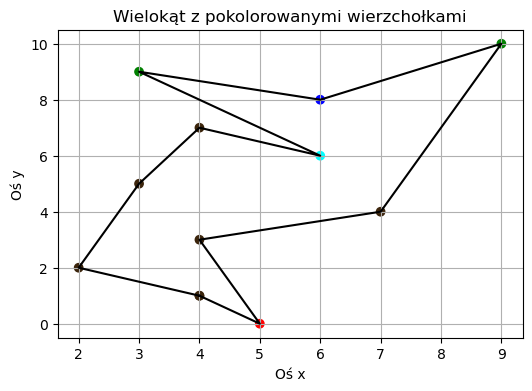

In [75]:
def draw_polygon_colors():
    x = np.array([4, 2, 3, 4, 6, 3, 6, 9, 7, 4, 5])
    y = np.array([1, 2, 5, 7, 6, 9, 8, 10, 4, 3, 0])
    x = np.append(x, x[0])
    y = np.append(y, y[0])
    
    # Definiowanie kolorów dla wierzchołków (po jednym kolorze na każdy wierzchołek)
    colors = ['#3B240B', '#3B240B', '#3B240B', '#3B240B', 'cyan', 'green', 'blue', 'green', '#3B240B', '#3B240B', 'red', '#3B240B']
    
    plt.figure(figsize=(6, 4))
    plt.scatter(x, y, c=colors, marker='o')  # Używamy scatter z argumentem c
    plt.plot(x, y, linestyle='-', color='black')  # Rysujemy linie łączące wierzchołki
    plt.title("Wielokąt z pokolorowanymi wierzchołkami")
    plt.xlabel("Oś x")
    plt.ylabel("Oś y")
    plt.grid(True)
    plt.show()



In [46]:
def draw_polygon_tri():
    x = np.array([4, 2, 3, 6, 3, 6, 9, 7, 4, 5])  
    y = np.array([1, 2, 5, 7, 9, 10, 7, 4, 3, 0])  
    x = np.append(x, x[0])
    y = np.append(y, y[0])
    plt.figure(figsize=(6, 4))
    plt.plot(x, y, marker='o')
    plt.plot([x[3], x[5]], [y[3], y[5]], 'r-')
    plt.plot([x[0], x[8]], [y[0], y[8]], 'r-')
    plt.plot([x[1], x[8]], [y[1], y[8]], 'r-')
    plt.plot([x[2], x[8]], [y[2], y[8]], 'r-')
    plt.plot([x[2], x[7]], [y[2], y[7]], 'r-')
    plt.plot([x[3], x[7]], [y[3], y[7]], 'r-')
    plt.plot([x[3], x[6]], [y[3], y[6]], 'r-')
    plt.title("Przykładowy wielokąt y-monotoniczny na którym dokonaliśmy triangulacji")
    plt.xlabel("Oś x")
    plt.ylabel("Oś y")
    plt.grid(True)
    plt.show()


## Wprowadzenie
Celem ćwiczenia jest:
- sprawdzanie $y$-monotoniczności
- podział wierchołków na kategorie
- triangulacja wielokąta monotonicznego

### Przykładowy wielokąt $y$-monotoniczny

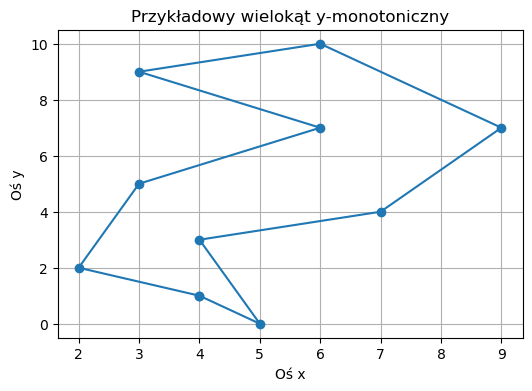

In [27]:
draw_polygon()

Do tego celu wygeneruj wielokąt za pomocą poniżej podanej funkcji. Punkty podawaj w kierunku przeciwnym do ruchu wskazkówek zegara.


In [ ]:
polygon = # funkcja generująca wielokąt

## Czy wielokąt jest $y$-monotoniczny?

Wielokąt jest monotoniczny, gdy jego wierzchołki mogą być ułożone w taki sposób, że jedna z jego współrzędnych (na przykład współrzędna $x$ lub $y$, w zależności od układu współrzędnych) zawsze rośnie lub maleje wzdłuż kolejnych wierzchołków. Innymi słowy, dla każdej pary wierzchołków wielokąta (oprócz wierzchołka startowego i końcowego), jeden z punktów ma większą (lub mniejszą) wartość danej współrzędnej niż drugi punkt.

W praktyce, wielokąt monotoniczny może być łatwiej sortowany lub przetwarzany w pewnych algorytmach geometrycznych, ponieważ istnieje pewna kolejność, w jakiej wierzchołki pojawiają się wzdłuż danej osi (np. osi $x$ lub $y$). Monotoniczność może ułatwić znajdowanie przecięć linii w takim wielokącie lub wykonywanie innych operacji geometrycznych. W tym zadaniu interesuje nas monotoniczność wielokąta wzdłuż osi $y$.

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```is_y_monotonic```. Pamiętaj, aby sprawozdanie zawierało krótki opis działania tej funkcji.

In [ ]:
def is_y_monotonic(polygon):
    """
    Funkcja określa czy podana figura jest y-monotoniczna.
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: wartość bool - true, jeśli wielokąt jest monotoniczny i false jeśli nie jest
    """

    raise Exception("Unimplemented")

Przeprowadź test poprawności powyższej funkcji.

In [ ]:
# testy

Sprawdź monotoniczność swojego wielokąta.

In [ ]:
print(is_y_monotonic(polygon))

***

# Podział wierzchołków na kategorie

Wierzchołki naszego wielokąta możemy podzielić na parę kategorii:
- początkowe, gdy obaj jego sąsiedzi leżą poniżej i kąt wewnętrzny ma mniej niż 180 stopni. To wierzchołki, w których wielokąt zaczyna się monotoniczny spadek 
- końcowe, gdy obaj jego sąsiedzi leżą powyżej i kąt wewnętrzny ma mniej niż 180 stopni. To wierzchołki, w których monotoniczność wielokąta się zmienia, czyli na przykład zaczyna się monotoniczny wzrost, jeśli wcześniej był spadek, lub na odwrót.

Wierzchołki startowe i końcowe są ważne w kontekście algorytmów przetwarzania wielokątów monotonicznych, takich jak algorytmy dziel i zwyciężaj oraz triangulacji. 
- dzielący, gdy obaj jego sąsiedzi leżą poniżej i kąt wewnęntrzny ma więcej niż 180 stopni. To wierzchołki, które wyznaczają przekątne (linie łączące), tworzące trójkąty podczas triangulacji.
- łączący, gdy obaj jego sąsiedzi leżą powyżej i kąt wewnęntrzny ma więcej niż 180 stopni. To wierzchołki, które są połączone liniami (przekątnymi) wewnątrz wielokąta, tworząc trójkąty.

Wierzchołki łączące i dzielące odgrywają kluczową rolę w procesie triangulacji wielokątów, pozwalając na podział figury na trójkąty w sposób bezkolizyjny. 
- prawdiłowy, pozostałe przypadki, jeden sąsiad powyżej drugi poniżej


### Przykładowy wielokąt z pokolorowanymi wierzchołkami.

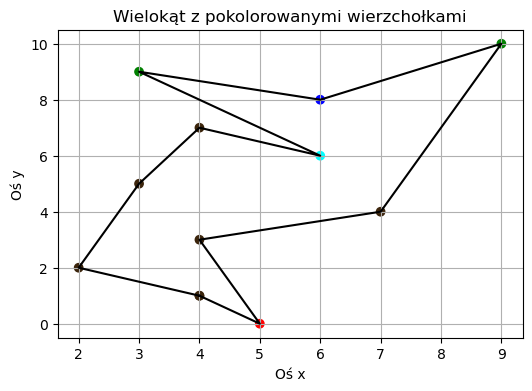

In [76]:
draw_polygon_colors()

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```color_vertex``` .

In [ ]:
def color_vertex(polygon):
    """

    Funkcja dzieli wierzchołki na kategorie i przypisuje wierzchołkom odpowiednie numery: 0 - początkowy, 1 - końcowy, 2 - łączący, 3 - dzielący, 4 - prawdiłowy
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: tablica o długości n, gdzie n = len(polygon), zawierająca cyfry z przedziału 0 - 4, gdzie T[i] odpowiada kategorii i-tego wierzchołka.
    """
    

    raise Exception("Unimplemented")

Przeprowadź test poprawności powyższej funkcji. 

In [ ]:
# testy

Zwizualizuj swój wielokąt z pokolorowanymi według kategorii wierzchołkami.

In [ ]:
# wizualizacja

***

# Triangulacja wielokąta monotonicznego

Triangulacja wielokąta monotonicznego to proces podziału wielokąta monotonicznego na trójkąty poprzez dodawanie przekątnych (linii łączących wierzchołki), które nie przecinają się wewnętrznie.

### Przykładowy wielokąt podzielony na trójkąty.

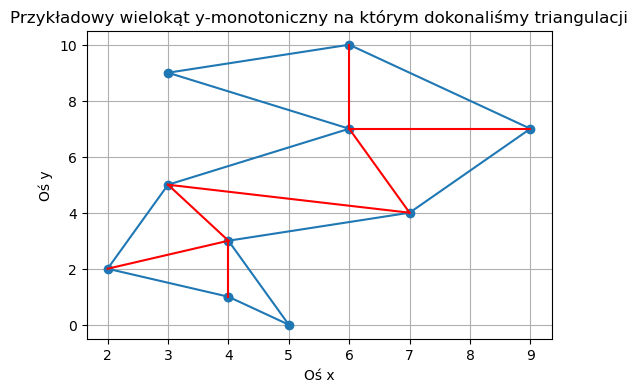

In [47]:
draw_polygon_tri()

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```triangulation```. Wykorzystaj algorytm opisany na wykładzie.

In [ ]:
def triangulation(polygon):
    """

    Funkcja dokonuje triangulacji wielokąta monotonicznego. 
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: tablica krotek dodawanych po kolei przekątnych np: [(1,5),(2,3)], oznacza, że triangulacja polega na dodaniu przekątnej pomiędzy wierzchołki 1-5 i 2-3
    """

Jakich struktur można użyć do przechowywania wielokątu, oraz utworzonej triangulacji? Uzasadnij wybór struktury w swoim algorytmie

ODPOWIEDŹ: 

Przeprowadź testy poprawności powyższej funkcji.


In [ ]:
# testy

Zwizualizuj powstały wielokąt podzielony na trójkąty.

In [ ]:
# wizualizacja

Wykonaj ćwiczenie dla różnych wielokątów. Uzasadnij wybór wielokątu. Wnioski opisz w sprawozdaniu.

WNIOSKI HERE